In [66]:
# INCLUDED.
# Dependencies and Setup
import hvplot.pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress


In [67]:
# INCLUDED.
# Load the listings CSV file 1 into a Pandas DataFrame
list_data_prev = pd.read_csv("Resources/listings-complete.csv")

list_data = pd.DataFrame({"id" : list_data_prev["id"],
                        "description" : list_data_prev["description"],
                        "neighborhood_overview" : list_data_prev["neighborhood_overview"],
                        "host_response_time" : list_data_prev["host_response_time"],
                        "host_response_rate" : list_data_prev["host_response_rate"],
                        "host_acceptance_rate" : list_data_prev["host_acceptance_rate"],
                        "host_listings_count" : list_data_prev["host_listings_count"],
                        "neighbourhood" : list_data_prev["neighbourhood_cleansed"],
                        "latitude" : list_data_prev["latitude"],
                        "longitude" : list_data_prev["longitude"],
                        "room_type" : list_data_prev["room_type"],
                        "availability_365" : list_data_prev["availability_365"], 
                        "number_of_reviews" : list_data_prev["number_of_reviews"], 
                        "review_scores_accuracy" : list_data_prev["review_scores_accuracy"], 
                        "review_scores_cleanliness" : list_data_prev["review_scores_cleanliness"], 
                        "review_scores_checkin" : list_data_prev["review_scores_checkin"], 
                        "review_scores_communication" : list_data_prev["review_scores_communication"], 
                        "review_scores_location" : list_data_prev["review_scores_location"], 
                        "review_scores_value" : list_data_prev["review_scores_value"], 
                        "reviews_per_month" : list_data_prev["reviews_per_month"],
                        "review_scores_rating" : list_data_prev["review_scores_rating"],
                         "host_is_superhost" : list_data_prev["host_is_superhost"],
                         "host_listings_count" : list_data_prev["host_listings_count"],
                         "host_has_profile_pic" : list_data_prev["host_has_profile_pic"],
                         "host_identity_verified" : list_data_prev["host_identity_verified"],
                         "room_type" : list_data_prev["room_type"],
                         "accommodates" : list_data_prev["accommodates"],
                         "bedrooms" : list_data_prev["bedrooms"],
                         "minimum_nights" : list_data_prev["minimum_nights"],
                         "maximum_nights" : list_data_prev["maximum_nights"],
                         "instant_bookable" : list_data_prev["instant_bookable"],
                         "price" : list_data_prev["price"]})

In [68]:
# INCLUDED.
list_data['host_acceptance_rate'] = list_data['host_acceptance_rate'].str.rstrip("%").astype(float)/100
list_data['host_response_rate'] = list_data['host_response_rate'].str.rstrip("%").astype(float)/100

In [69]:
# INCLUDED.
list_data['price_clean'] = list_data['price'].replace('[\$,]', '', regex=True).astype(float)

In [70]:
# INCLUDED.
list_data["occupancy_rate"] = (365-list_data["availability_365"])/365*100

In [71]:
list_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23014 entries, 0 to 23013
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23014 non-null  int64  
 1   description                  22138 non-null  object 
 2   neighborhood_overview        14461 non-null  object 
 3   host_response_time           20708 non-null  object 
 4   host_response_rate           20708 non-null  float64
 5   host_acceptance_rate         21201 non-null  float64
 6   host_listings_count          23014 non-null  int64  
 7   neighbourhood                23014 non-null  object 
 8   latitude                     23014 non-null  float64
 9   longitude                    23014 non-null  float64
 10  room_type                    23014 non-null  object 
 11  availability_365             23014 non-null  int64  
 12  number_of_reviews            23014 non-null  int64  
 13  review_scores_ac

In [72]:
list_data.corr()

,id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,...,review_scores_location,review_scores_value,reviews_per_month,review_scores_rating,accommodates,bedrooms,minimum_nights,maximum_nights,price_clean,occupancy_rate
id,1.000000,0.118391,0.132298,0.100173,0.085596,0.005087,0.144130,-0.305094,-0.021369,-0.005192,...,-0.010395,-0.022245,0.179191,0.007402,0.057368,0.022756,-0.046101,-0.160567,-0.001428,-0.144130
host_response_rate,0.118391,1.000000,0.562563,0.088413,0.112666,-0.004730,-0.016243,0.138748,0.228375,0.244296,...,0.233583,0.217387,0.168395,0.279518,0.104001,0.022318,-0.102103,0.014918,-0.001843,0.016243
host_acceptance_rate,0.132298,0.562563,1.000000,0.100911,0.106558,0.003720,0.047035,0.151521,0.045828,0.074648,...,0.039991,0.035061,0.235161,0.085925,0.091225,0.001428,-0.047056,0.012382,0.005776,-0.047035
host_listings_count,0.100173,0.088413,0.100911,1.000000,0.097027,-0.040726,0.097548,0.016473,-0.012735,0.012061,...,0.020343,-0.032090,0.092784,-0.012530,0.089876,0.059983,-0.029691,0.022982,0.005376,-0.097548
latitude,0.085596,0.112666,0.106558,0.097027,1.000000,0.064096,-0.018615,0.117444,0.045355,0.042977,...,0.077780,0.033770,0.167328,0.045964,0.063211,0.021092,-0.027495,-0.004827,0.004593,0.018615
longitude,0.005087,-0.004730,0.003720,-0.040726,0.064096,1.000000,-0.001796,0.070058,-0.022662,-0.024602,...,-0.051058,-0.014287,0.099777,-0.017396,-0.002007,-0.025969,-0.013244,-0.010115,-0.009545,0.001796
availability_365,0.144130,-0.016243,0.047035,0.097548,-0.018615,-0.001796,1.000000,-0.031742,-0.087240,-0.066364,...,-0.066689,-0.096923,0.083908,-0.078823,0.004626,0.002577,0.008225,0.071979,0.004862,-1.000000
number_of_reviews,-0.305094,0.138748,0.151521,0.016473,0.117444,0.070058,-0.031742,1.000000,0.093053,0.086264,...,0.070847,0.095844,0.585811,0.083756,0.056815,-0.014401,-0.047064,0.076539,-0.004762,0.031742
review_scores_accuracy,-0.021369,0.228375,0.045828,-0.012735,0.045355,-0.022662,-0.087240,0.093053,1.000000,0.803377,...,0.728541,0.855659,0.082648,0.889874,-0.000375,-0.025883,-0.002652,0.002022,0.000647,0.087240
review_scores_cleanliness,-0.005192,0.244296,0.074648,0.012061,0.042977,-0.024602,-0.066364,0.086264,0.803377,1.000000,...,0.669469,0.803489,0.091174,0.830476,0.009019,-0.017931,0.002461,0.003696,-0.000988,0.066364


In [ ]:
#We can see that the correlation between occupancy rate and the factors above is very small. We will try to find a correlation using other factors.

In [110]:
#Being a super host has a very small difference in average occupancy rate. 
super_host_occupancy = list_data.groupby("host_is_superhost")["occupancy_rate"].median(numeric_only=True).sort_values(ascending=True)
super_host_occupancy

host_is_superhost
f    12.054795
t    21.643836
Name: occupancy_rate, dtype: float64

In [74]:
superhost_true = list_data.loc[(list_data["host_is_superhost"]=="t"), :]
super_host_true_occupancy = superhost_true["occupancy_rate"]

In [75]:
superhost_false = list_data.loc[(list_data["host_is_superhost"]=="f"), :]
super_host_false_occupancy = superhost_false["occupancy_rate"]

In [76]:
box_df_1 = pd.concat([super_host_true_occupancy, super_host_false_occupancy], axis=1)
box_df_1.columns = ['Superhost', 'Non-superhost']

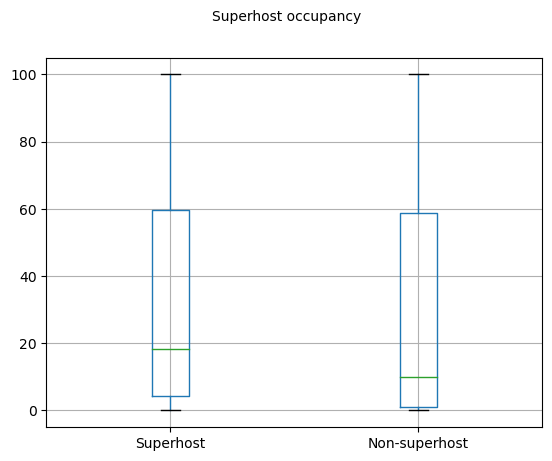

In [77]:
ax_1 = box_df_1.boxplot()
ax_1.get_figure().suptitle(t='Superhost occupancy', fontsize=10)
plt.savefig("superhost.png")
plt.show()

In [111]:
#Having a profile picture has a significant difference in average occupancy rate.
profile_pic_occupancy = list_data.groupby("host_has_profile_pic")["occupancy_rate"].median(numeric_only=True).sort_values(ascending=True)
profile_pic_occupancy


host_has_profile_pic
f     2.191781
t    16.712329
Name: occupancy_rate, dtype: float64

In [116]:
profile_pic_outliers = list_data.loc[(list_data["host_has_profile_pic"]=="t") & (list_data["occupancy_rate"]>20), :]
profile_outliers_count = profile_pic_outliers["neighbourhood"].value_counts().sort_values(ascending=True)
profile_outliers_count

Tláhuac                      4
La Magdalena Contreras      14
Xochimilco                  26
Iztapalapa                  31
Azcapotzalco                43
Iztacalco                   62
Gustavo A. Madero           67
Cuajimalpa de Morelos       81
Venustiano Carranza        134
Tlalpan                    152
Álvaro Obregón             161
Coyoacán                   348
Benito Juárez              712
Miguel Hidalgo             960
Cuauhtémoc                2587
Name: neighbourhood, dtype: int64

In [79]:
picture_true = list_data.loc[(list_data["host_has_profile_pic"]=="t"), :]
picture_true_occupancy = picture_true["occupancy_rate"]

In [80]:
picture_false = list_data.loc[(list_data["host_has_profile_pic"]=="f"), :]
picture_false_occupancy = picture_false["occupancy_rate"]

In [81]:
box_df_2 = pd.concat([picture_true_occupancy, picture_false_occupancy], axis=1)
box_df_2.columns = ['Profile Picture', 'Not Profile Picture']

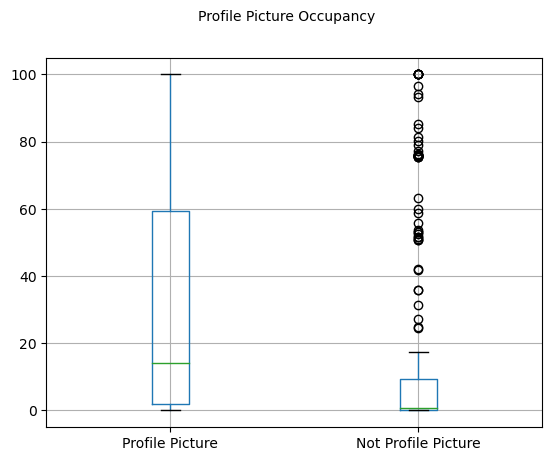

In [82]:
ax_2 = box_df_2.boxplot()
ax_2.get_figure().suptitle(t='Profile Picture Occupancy', fontsize=10)
plt.savefig("profile.png")
plt.show()

In [117]:
#Having a identity verified has a very small difference in average occupancy rate.
identity_verified_occupancy = list_data.groupby("host_identity_verified")["occupancy_rate"].median(numeric_only=True).sort_values(ascending=True)
identity_verified_occupancy

host_identity_verified
f     8.493151
t    16.986301
Name: occupancy_rate, dtype: float64

In [84]:
identity_true = list_data.loc[(list_data["host_identity_verified"]=="t"), :]
identity_true_occupancy = identity_true["occupancy_rate"]

In [85]:
identity_false = list_data.loc[(list_data["host_identity_verified"]=="f"), :]
identity_false_occupancy = identity_false["occupancy_rate"]

In [86]:
box_df_3 = pd.concat([identity_true_occupancy, identity_false_occupancy], axis=1)
box_df_3.columns = ['Identity Verified', 'Identity Not Verified']

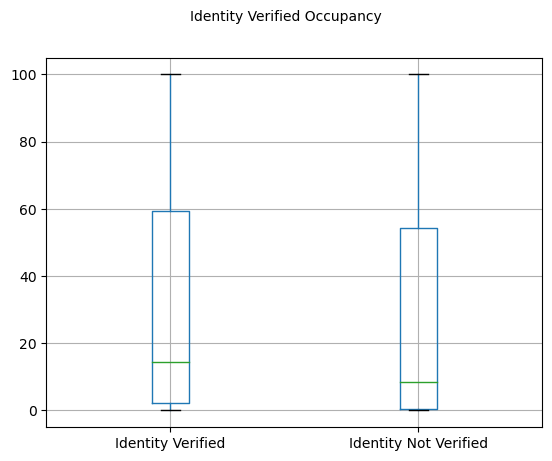

In [87]:
ax_3 = box_df_3.boxplot()
ax_3.get_figure().suptitle(t='Identity Verified Occupancy', fontsize=10)
plt.savefig("identity.png")
plt.show()

In [118]:
#Having an instantly bookable listing has a significant difference in average occupancy rate.
instantly_bookable_occupancy = list_data.groupby("instant_bookable")["occupancy_rate"].median(numeric_only=True).sort_values(ascending=True)
instantly_bookable_occupancy

instant_bookable
t     9.863014
f    25.479452
Name: occupancy_rate, dtype: float64

In [89]:
bookable_true = list_data.loc[(list_data["instant_bookable"]=="t"), :]
bookable_true_occupancy = bookable_true["occupancy_rate"]

In [90]:
bookable_false = list_data.loc[(list_data["instant_bookable"]=="f"), :]
bookable_false_occupancy = bookable_false["occupancy_rate"]

In [91]:
box_df_4 = pd.concat([bookable_true_occupancy, bookable_false_occupancy], axis=1)
box_df_4.columns = ['Instant Bookable', 'Not Instant Bookable']

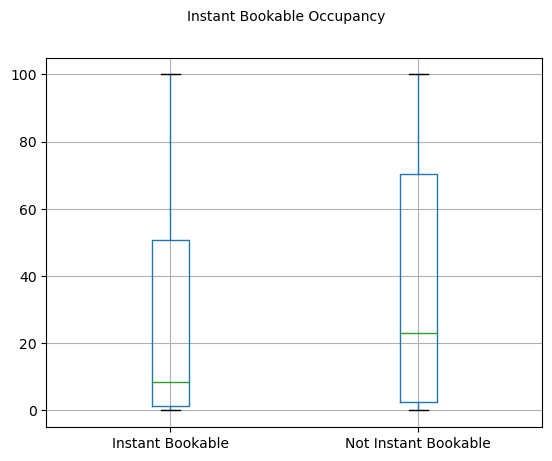

In [92]:
ax_4 = box_df_4.boxplot()
ax_4.get_figure().suptitle(t='Instant Bookable Occupancy', fontsize=10)
plt.savefig("bookable.png")
plt.show()

The r-value is 0.0899563916796215.
The p-value is 4.596077645993964e-22.


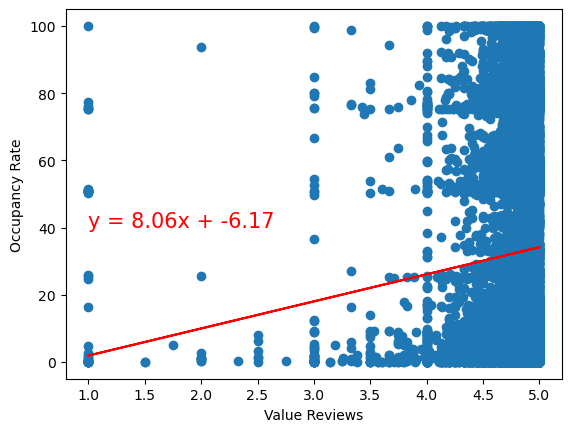

In [93]:
#The strongest correlation of occupancy rate with numerical values is review_scores_value 
#and even then the p-value is too small to say there's a realationship.

list_data= list_data.dropna(axis= 0, how='any')

(slope, intercept, rvalue, pvalue, stderr) = linregress(list_data["review_scores_value"], list_data["occupancy_rate"])
regress_values = list_data["review_scores_value"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(list_data["review_scores_value"], list_data["occupancy_rate"])
plt.plot(list_data["review_scores_value"], regress_values, "r-")
plt.annotate(line_eq, (1, 40), fontsize=15, color="red")
plt.xlabel("Value Reviews")
plt.ylabel("Occupancy Rate")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.savefig("reviews.png")
plt.show()

In [94]:
response_time_occupancy = list_data.groupby("host_response_time")["occupancy_rate"].mean(numeric_only=True).sort_values(ascending=True)
response_time_occupancy

host_response_time
within an hour        31.597896
a few days or more    32.887971
within a few hours    34.542627
within a day          34.934146
Name: occupancy_rate, dtype: float64

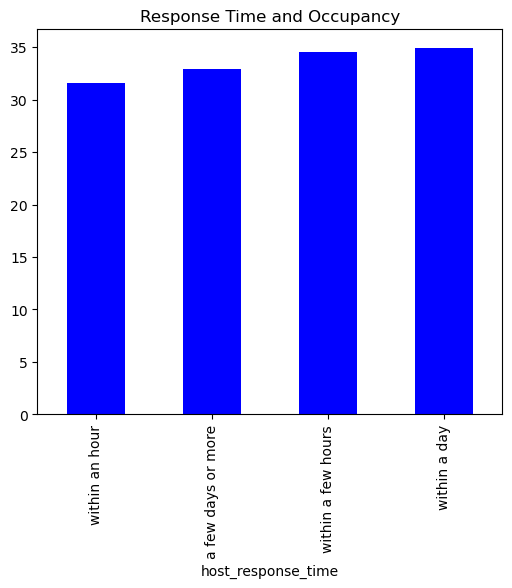

In [95]:
response_time_occupancy_graph = response_time_occupancy.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Response Time and Occupancy")
plt.savefig("response-time.png")
plt.show()

In [96]:
neighbourhood_occupancy = list_data.groupby("neighbourhood")["occupancy_rate"].mean(numeric_only=True).sort_values(ascending=True)
neighbourhood_occupancy

neighbourhood
Milpa Alta                 2.958904
La Magdalena Contreras    19.810828
Tláhuac                   19.850560
Iztapalapa                24.121902
Cuajimalpa de Morelos     24.576879
Álvaro Obregón            26.583802
Azcapotzalco              27.329419
Xochimilco                28.565012
Gustavo A. Madero         28.871878
Venustiano Carranza       29.103552
Tlalpan                   30.626866
Benito Juárez             31.658978
Miguel Hidalgo            31.678838
Coyoacán                  32.010049
Cuauhtémoc                33.840483
Iztacalco                 35.977488
Name: occupancy_rate, dtype: float64

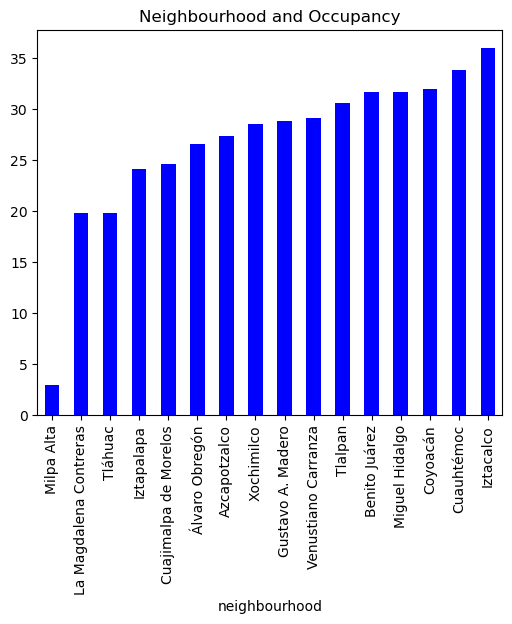

In [97]:
neighbourhood_occupancy.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Neighbourhood and Occupancy")
plt.savefig("neighbourhood.png")
plt.show()

In [120]:
neighbourhood_price = list_data.groupby("neighbourhood")["price_clean"].median(numeric_only=True).sort_values(ascending=True)
neighbourhood_price

neighbourhood
Tláhuac                    248.0
Iztapalapa                 350.0
Milpa Alta                 380.0
Xochimilco                 500.0
Gustavo A. Madero          533.0
Venustiano Carranza        549.0
Iztacalco                  550.0
Tlalpan                    550.0
Azcapotzalco               590.0
La Magdalena Contreras     612.5
Coyoacán                   700.0
Benito Juárez              776.0
Álvaro Obregón             817.0
Cuajimalpa de Morelos     1082.5
Cuauhtémoc                1200.0
Miguel Hidalgo            1339.0
Name: price_clean, dtype: float64

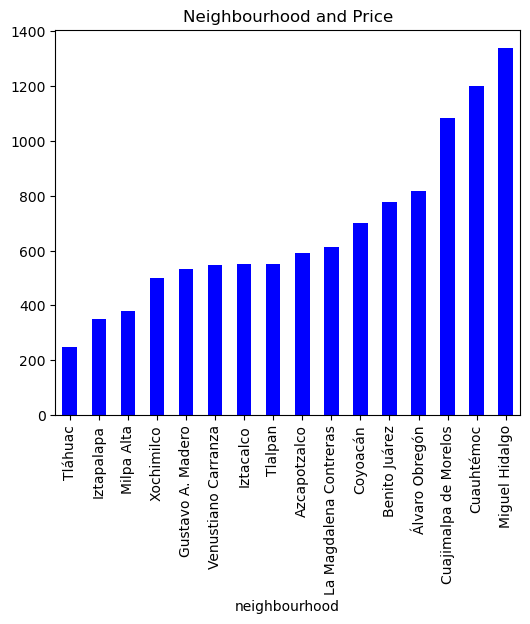

In [122]:
neighbourhood_price.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Neighbourhood and Price")
plt.savefig("neighbourhood_price.png")
plt.show()

In [98]:
room_type_occupancy = list_data.groupby("room_type")["occupancy_rate"].mean(numeric_only=True).sort_values(ascending=True)
room_type_occupancy

room_type
Shared room        20.485229
Hotel room         28.589847
Private room       30.736678
Entire home/apt    32.832442
Name: occupancy_rate, dtype: float64

In [99]:
room_type_count = list_data["room_type"].value_counts().sort_values(ascending=True)
room_type_count

Hotel room           51
Shared room          83
Private room       3505
Entire home/apt    7841
Name: room_type, dtype: int64

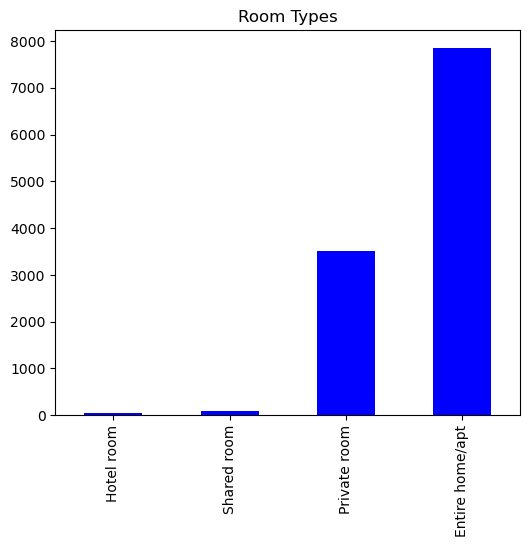

In [100]:
room_type_count.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Room Types")
plt.savefig("room-type-count.png")
plt.show()

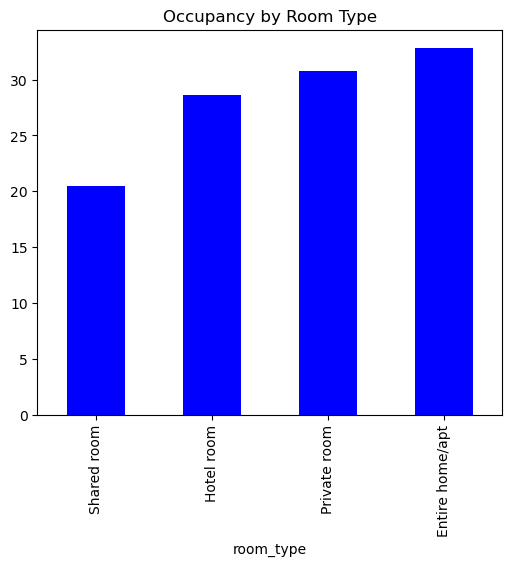

In [101]:
room_type_occupancy.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Occupancy by Room Type")
plt.savefig("room-type-occupancy.png")
plt.show()

In [102]:
superhost_occupancy = list_data.groupby("host_is_superhost")["occupancy_rate"].mean(numeric_only=True).sort_values(ascending=True)
superhost_occupancy

host_is_superhost
f    30.348912
t    34.157032
Name: occupancy_rate, dtype: float64

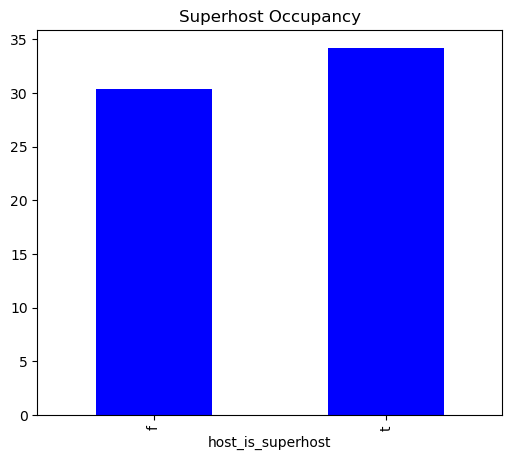

In [103]:
superhost_occupancy.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Superhost Occupancy")
plt.savefig("superhost-occupancy.png")
plt.show()

In [104]:
picture_occupancy = list_data.groupby("host_has_profile_pic")["occupancy_rate"].mean(numeric_only=True).sort_values(ascending=True)
picture_occupancy

host_has_profile_pic
f    21.166920
t    32.110197
Name: occupancy_rate, dtype: float64

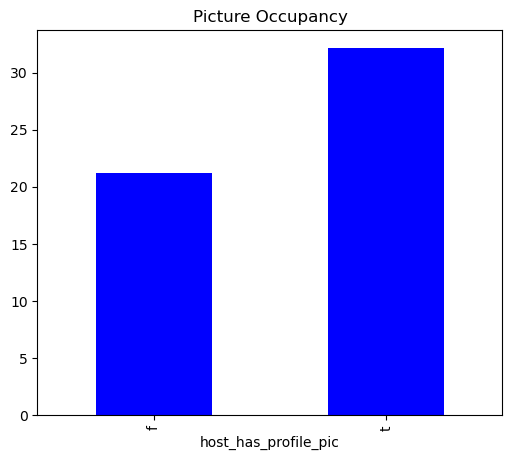

In [105]:
picture_occupancy.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Picture Occupancy")
plt.savefig("picture-occupancy.png")
plt.show()

In [106]:
identity_occupancy = list_data.groupby("host_identity_verified")["occupancy_rate"].mean(numeric_only=True).sort_values(ascending=True)
identity_occupancy

host_identity_verified
f    27.557634
t    32.358812
Name: occupancy_rate, dtype: float64

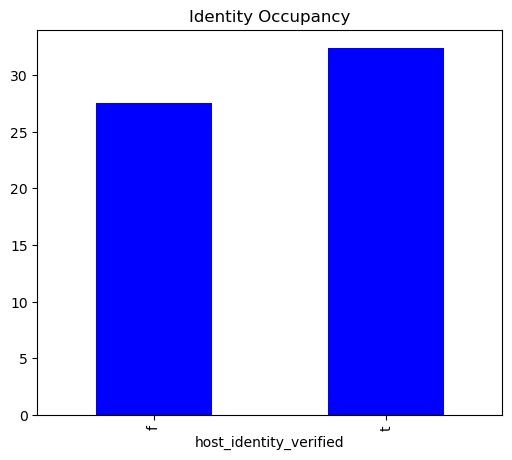

In [107]:
identity_occupancy.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Identity Occupancy")
plt.savefig("identity-occupancy.png")
plt.show()

In [108]:
bookable_occupancy = list_data.groupby("instant_bookable")["occupancy_rate"].mean(numeric_only=True).sort_values(ascending=True)
bookable_occupancy

instant_bookable
t    25.608269
f    36.050215
Name: occupancy_rate, dtype: float64

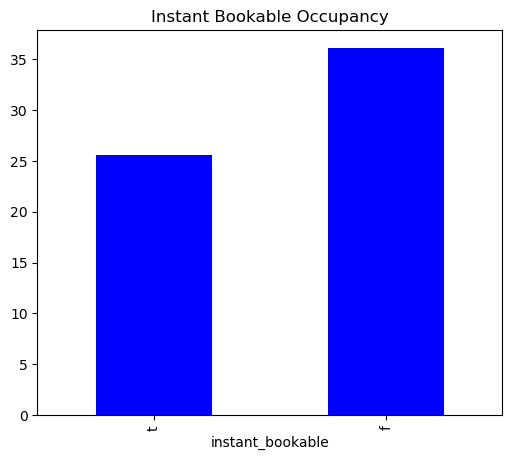

In [109]:
bookable_occupancy.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Instant Bookable Occupancy")
plt.savefig("bookable-occupancy.png")
plt.show()